#Theoretical

1. What does R-squred represent in a regression model?
- R-squared repesented that determines the proporation of variance in the dependent variable that can be explained by the independent variable.

2. What are the assumptions of linear regression?
- Major assumption:
1. Linearity
2. Independence
3. Homoscedasticity
4. Normality of residuals
5. No multicollinearity

3. What is the difference between R-squared and Adjusted R-squared?
- The difference between R squared and adjusted R squared value is that R squared value assumes that all the independent variables considered affect the result of the model, whereas the adjusted R squared value considers only those independent variables which actually have an effect on the performance of the model.

4. Why do we use Mean Squared Error (MSE)?
- Mean Squared Error (MSE) is used to measure the accuracy of a model's predictions by calculating the average of the squared differences between the actual and predicted values.

5.  What does an Adjusted R-squared value of 0.85 indicate?
- An adjusted R-squared value of 0.85 indicates that the model explains 85% of the variance in the dependent variable, while also accounting for the number of predictor variables in the model.

6. How do we check for normality of residuals in linear regression?
- To check for the normanlity of residuals in linear regression, use of a combination of graphical and statistical methods.

7. What is multicollinearity, and how does it impact regression?
- Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other. Multicollinearity adversely affects the statistical significance of the independent variables in common methods of regression analysis.

8. What is Mean Absolute Error (MAE)?
- Mean Absolute Error (MAE) is a measure of the average size of the mistakes in a collection of predictions, without taking their direction into account.

9. What are the benefits of using an ML pipeline?
- Benefitd of using an ML pipeline:
1. Automation and Efficiency
2. Fasteer Model Deployment
3. Improve Accuracy & Consistency
4. Handles Large Data easily
5. Cost Effective

10. Why is RMSE considered more interpretable than MSE?
- It's on the same scale as the original data, making it easier to understand the magnitude of the error. RMSE is more sensitive to outliers tham MSE.

11. What is pickling in Python, and how is it useful in ML?
- Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk.

12. What does a high R-squared value mean?
- A high R-squared value indicates that a statistical model effectively explains the variability in the dependent variable.

13. What happens if linear regression assumptions are violated?
- What happens if linear regression assumptions are violated.

14. How can we address multicollinearity in regression?
- One of the simpleest ways to deal with multicollinearity is to simply remove  one of the highly correleated varibales, often the one with the highest VIF value.

15.  How can feature selection improve model performance in regression analysis?
- Feature selection improves regression model performance by identifying and using only the most relevant predictors, reducing noise and overfitting, leading to more accurate, interpretable, and efficient models.

16. How is Adjusted R-squared calculated?
- It is calculated by dividing the explained variation by the total variation or 1- (Unexplained Variation/Total Variation)

17.  Why is MSE sensitive to outliers?
- MSE is sensitive to outliers because it amplifies the impact of large errors through squaring.

18.  What is the role of homoscedasticity in linear regression?
- Homoscedasticity is a pivotal concept in regression analysis that plays a substantial role in evaluating the trustworthiness of regression models.

19.What is Root Mean Squared Error (RMSE)?
- Root mean square error or root mean square deviation is one of the most commonly used measures for evaluating the quality of predictions.

20. Why is pickling considered risky?
- it is possible to provide malicious shell code as input, causing remote code execution.

21. What alternatives exist to pickling for saving ML models?
- Joblib, PMML, ONNX, and SafeTensors

22. What is heteroscedasticity, and why is it a problem?
- Heteroskedasticity refers to a situation where the variance of the residuals is unequal over a range of measured values. It is problematic beacuse it leads to inefficient and biased estimates, invalidating standard statistical tests like t-tests and f-tests.

23. How can interaction terms enhance a regression model's predictive power?
- Interaction terms in regression models enhance predictive power by capturing the combined effect of two or more variables.

#Practical


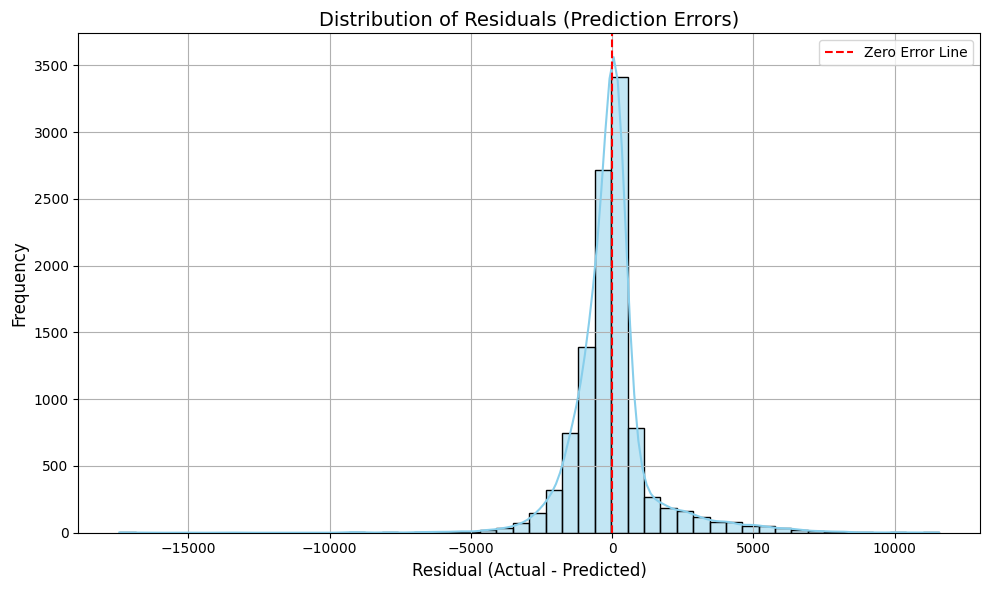

In [1]:
#1.Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

diamonds = sns.load_dataset('diamonds')

diamonds.dropna(inplace=True)

numeric_cols = diamonds.select_dtypes(include=np.number).columns.tolist()

X = diamonds[numeric_cols].drop(columns='price')
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50, color='skyblue')
plt.title("Distribution of Residuals (Prediction Errors)", fontsize=14)
plt.xlabel("Residual (Actual - Predicted)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Error Line')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
#2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model

import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

diamonds = sns.load_dataset('diamonds')

diamonds.dropna(inplace=True)

numeric_cols = diamonds.select_dtypes(include=np.number).columns.tolist()

X = diamonds[numeric_cols].drop(columns='price')
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 2178659.77
Mean Absolute Error (MAE): 884.62
Root Mean Squared Error (RMSE): 1476.03


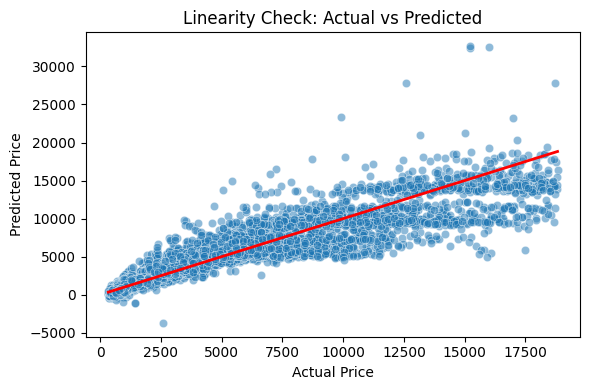

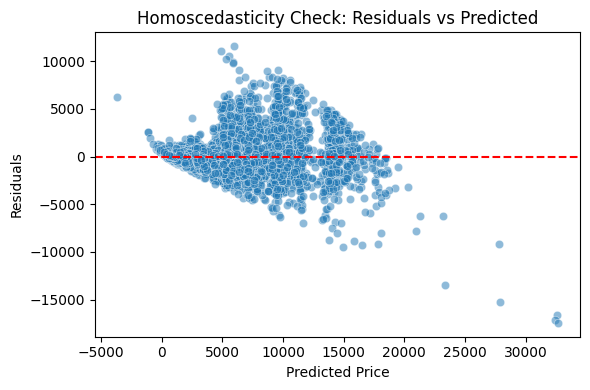

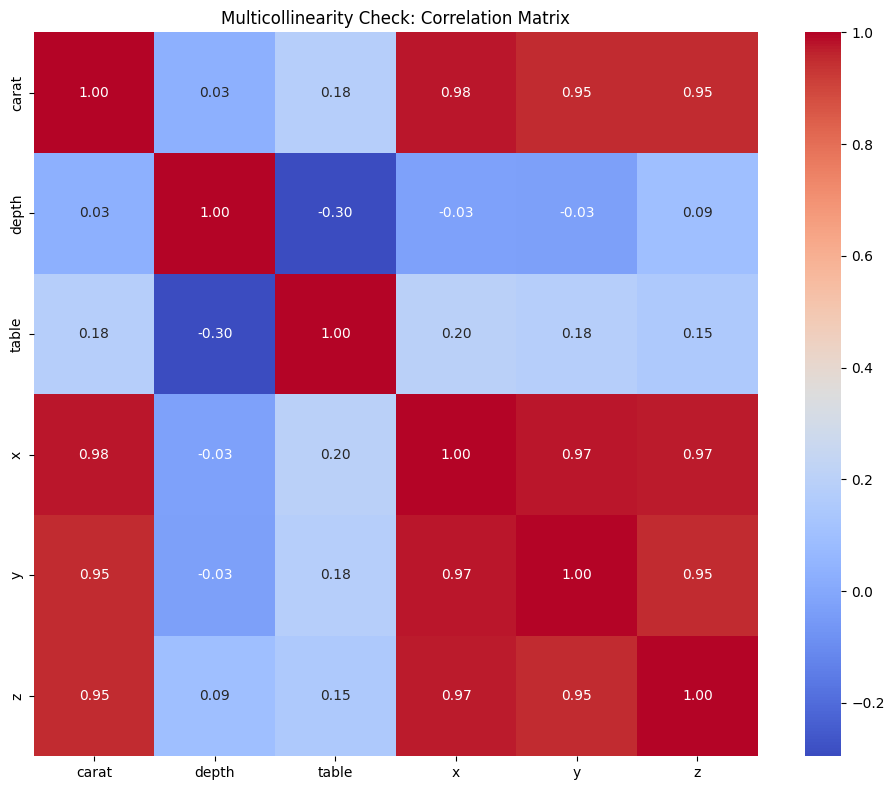

In [8]:
#3.  Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity


import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

diamonds = sns.load_dataset('diamonds')

diamonds.dropna(inplace=True)

numeric_cols = diamonds.select_dtypes(include=np.number).columns.tolist()
X = diamonds[numeric_cols].drop(columns='price')
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linearity Check: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Multicollinearity Check: Correlation Matrix")
plt.tight_layout()
plt.show()


In [9]:
#4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

diamonds = sns.load_dataset('diamonds')
diamonds.dropna(inplace=True)

numeric_cols = diamonds.select_dtypes(include=np.number).columns.tolist()
X = diamonds[numeric_cols].drop(columns='price')
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")
    print()

for name, model in models.items():
    evaluate_model(name, model, X_train, X_test, y_train, y_test)


--- Linear Regression ---
MAE:  888.48
MSE:  2242178.90
RMSE: 1497.39
R²:   0.8590

--- Ridge Regression ---
MAE:  888.64
MSE:  2242190.28
RMSE: 1497.39
R²:   0.8590

--- Lasso Regression ---
MAE:  888.68
MSE:  2242223.86
RMSE: 1497.41
R²:   0.8590

--- Random Forest ---
MAE:  787.66
MSE:  1901096.41
RMSE: 1378.80
R²:   0.8804



In [10]:
#5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

diamonds = sns.load_dataset('diamonds')
diamonds.dropna(inplace=True)

X = diamonds[['carat']]
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Simple Linear Regression Model")
print(f"Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared score: {r2_score(y_test, y_pred):.4f}")



Simple Linear Regression Model
Coefficient (slope): 7768.9105
Intercept: -2261.91
R-squared score: 0.8489


Simple Linear Regression: Predicting Tip from Total Bill
Coefficient (slope): 0.1070
Intercept: 0.9252
R-squared score: 0.5449


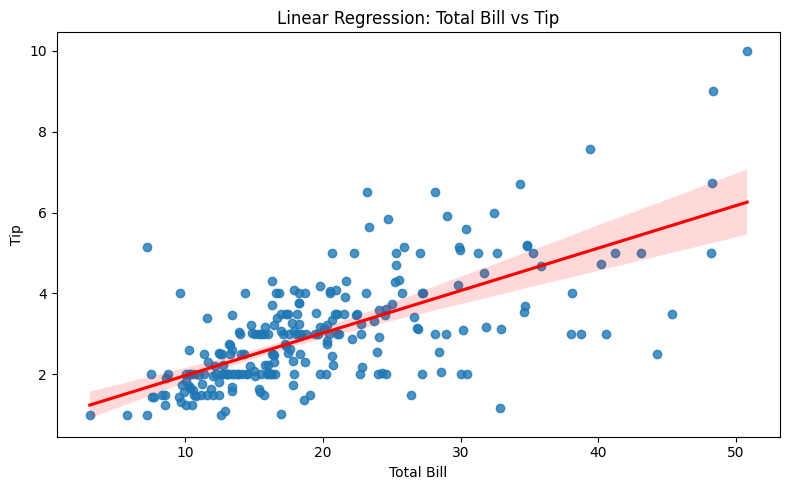

In [11]:
#6.  Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the tips dataset
tips = sns.load_dataset('tips')

# Define the independent and dependent variables
X = tips[['total_bill']]
y = tips['tip']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Print model parameters
print("Simple Linear Regression: Predicting Tip from Total Bill")
print(f"Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared score: {r2_score(y_test, y_pred):.4f}")

# Visualize with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='total_bill', y='tip', data=tips, line_kws={"color": "red"})
plt.title("Linear Regression: Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.tight_layout()
plt.show()


Linear Regression on Synthetic Data
Coefficient (slope): 44.44
Intercept: 1.17


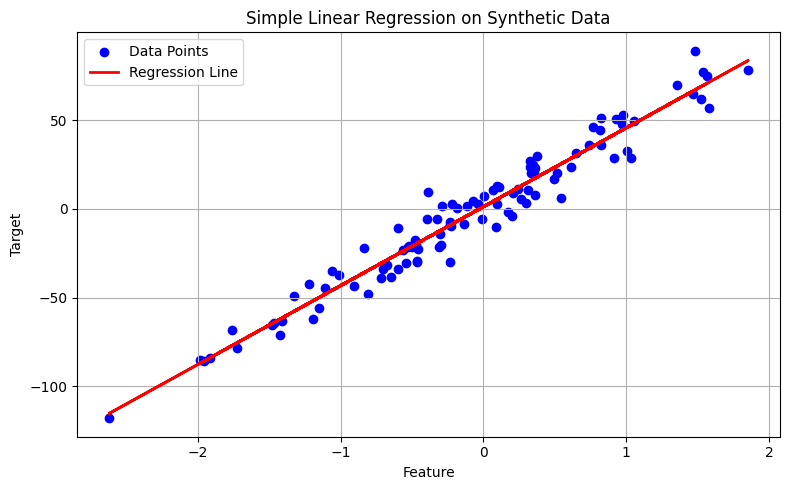

In [12]:
#7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print("Linear Regression on Synthetic Data")
print(f"Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Simple Linear Regression on Synthetic Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
#8. Write a Python script that pickles a trained linear regression model and saves it to a file.

import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

model = LinearRegression()
model.fit(X, y)

filename = 'linear_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Trained Linear Regression model saved to '{filename}'")


Trained Linear Regression model saved to 'linear_model.pkl'


In [15]:

with open('linear_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

y_pred = loaded_model.predict(X)


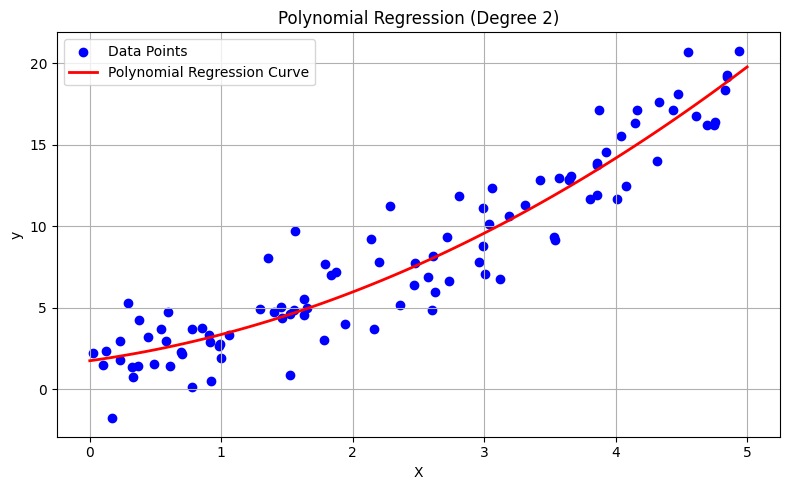

In [16]:
#9.  Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1) * 2

model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(X, y)

X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
y_plot = model.predict(X_plot)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Polynomial Regression Curve')
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [17]:
#10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.

import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)

print("Simple Linear Regression Model")
print(f"Coefficient (slope): {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")


Simple Linear Regression Model
Coefficient (slope): 2.7701
Intercept: 4.2151


Degree 1 polynomial regression R² score: 0.7867
Degree 2 polynomial regression R² score: 0.9317
Degree 3 polynomial regression R² score: 0.9347
Degree 4 polynomial regression R² score: 0.9349


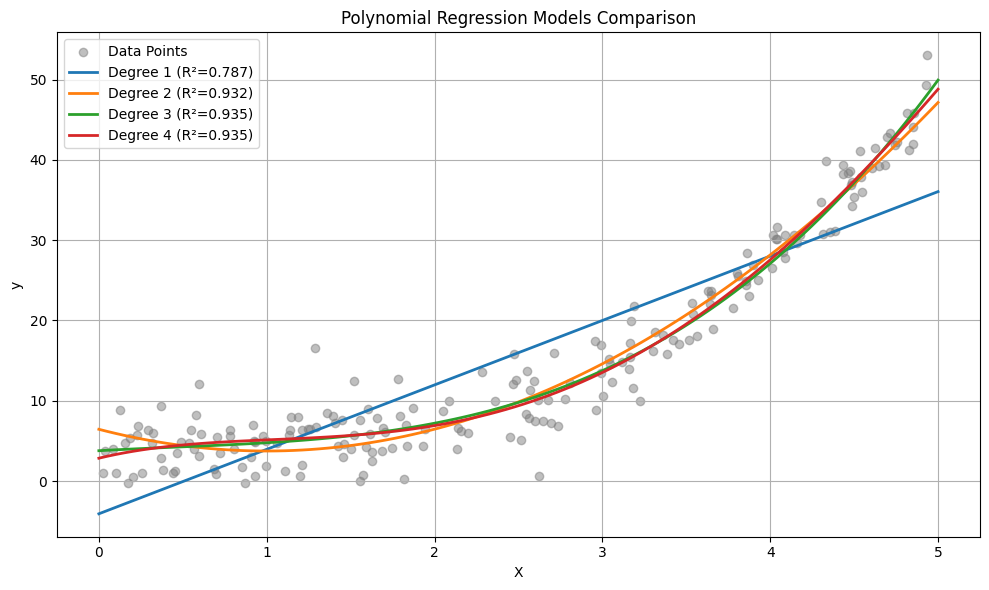

In [18]:
#11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
X = np.sort(5 * np.random.rand(200, 1), axis=0)
y = 0.5 * X**3 - X**2 + 2 * X + 3 + np.random.randn(200, 1) * 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 2, 3, 4]
plt.figure(figsize=(10, 6))

plt.scatter(X, y, color='gray', alpha=0.5, label='Data Points')

X_plot = np.linspace(0, 5, 100).reshape(-1, 1)

for degree in degrees:

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_plot = model.predict(X_plot)

    r2 = r2_score(y_test, y_pred)
    print(f"Degree {degree} polynomial regression R² score: {r2:.4f}")

    plt.plot(X_plot, y_plot, linewidth=2, label=f'Degree {degree} (R²={r2:.3f})')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Models Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
#12. Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
n_samples = 100

X = np.random.rand(n_samples, 2)

y = 3 * X[:, 0] + 5 * X[:, 1] + 4 + np.random.randn(n_samples) * 0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Linear Regression Model with Two Features")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared score: {r2_score(y_test, y_pred):.4f}")


Linear Regression Model with Two Features
Coefficients: [3.12725678 5.23707995]
Intercept: 3.8583
R-squared score: 0.9129


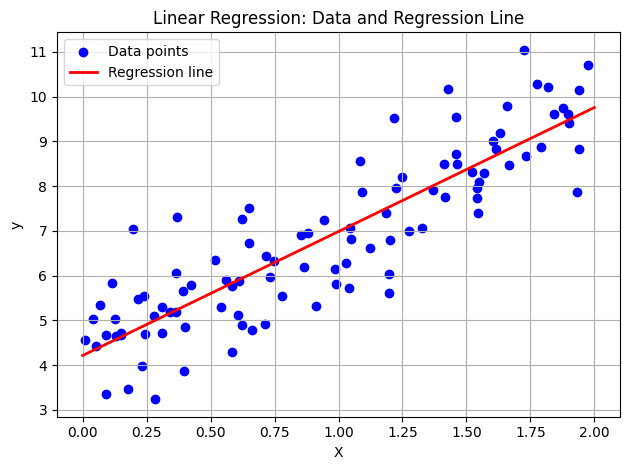

In [20]:
#13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)

X_fit = np.linspace(0, 2, 100).reshape(-1, 1)
y_fit = model.predict(X_fit)

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_fit, y_fit, color='red', linewidth=2, label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression: Data and Regression Line')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
#14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

np.random.seed(42)
n_samples = 100

X1 = np.random.rand(n_samples)
X2 = 0.8 * X1 + 0.2 * np.random.rand(n_samples)
X3 = np.random.rand(n_samples)
X4 = 0.5 * X2 + 0.5 * X3 + 0.1 * np.random.rand(n_samples)

df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'X4': X4
})

vif_data = pd.DataFrame()
vif_data['Feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)


Variance Inflation Factor (VIF) for each feature:
  Feature         VIF
0      X1   53.174132
1      X2  167.113483
2      X3   79.847235
3      X4  260.383137


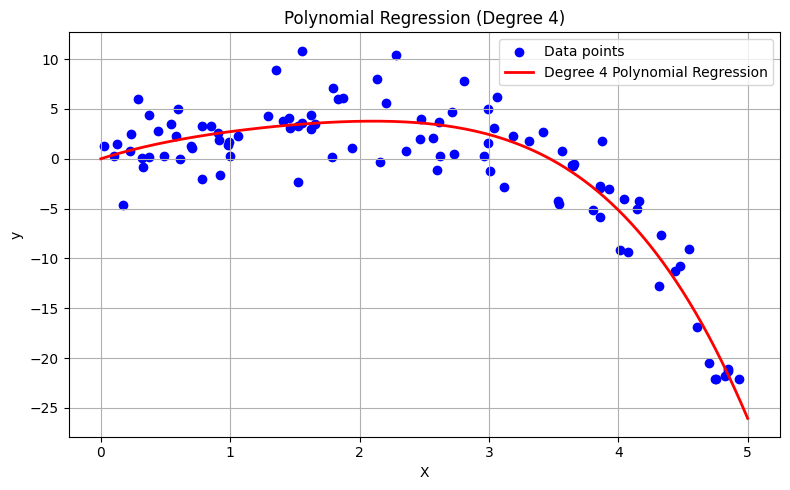

In [22]:
#15.  Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)

y = (1 + 2*X - 0.5*X**2 + 0.3*X**3 - 0.1*X**4).ravel() + np.random.randn(100) * 3

model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
model.fit(X, y)

X_plot = np.linspace(0, 5, 200).reshape(-1, 1)
y_plot = model.predict(X_plot)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Degree 4 Polynomial Regression')
plt.title('Polynomial Regression (Degree 4)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
#16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.

import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
n_samples = 150
n_features = 3

X = np.random.rand(n_samples, n_features)

coefficients = np.array([3.5, -2.0, 4.0])
y = X @ coefficients + 5 + np.random.randn(n_samples) * 0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = make_pipeline(StandardScaler(), LinearRegression())

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R-squared score on test data: {r2:.4f}")


R-squared score on test data: 0.8919


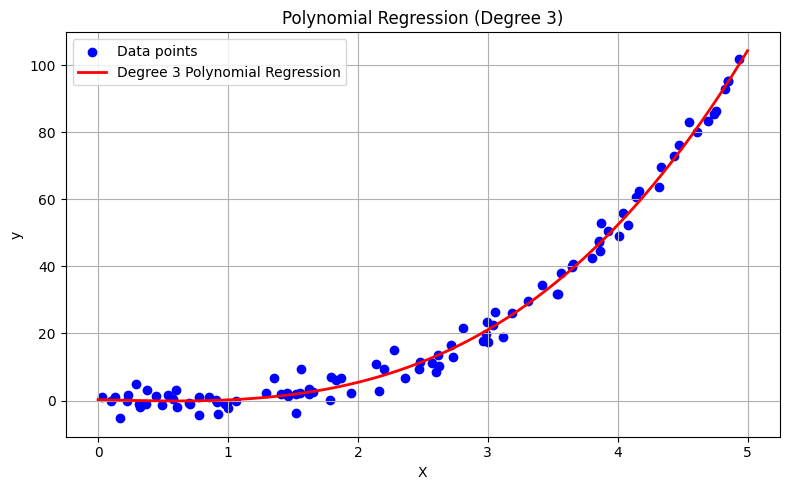

In [24]:
#17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = 1 - 2 * X + 0.5 * X**2 + 0.8 * X**3 + np.random.randn(100, 1) * 3

model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model.fit(X, y)

X_plot = np.linspace(0, 5, 200).reshape(-1, 1)
y_plot = model.predict(X_plot)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Degree 3 Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 3)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
#18.  Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)

n_samples = 200
n_features = 5

X = np.random.rand(n_samples, n_features)

true_coefs = np.array([3, -1.5, 2.0, 0, 4.5])

y = X @ true_coefs + 5 + np.random.randn(n_samples) * 0.8

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("Multiple Linear Regression Model")
print(f"R-squared score on test set: {r2:.4f}")
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_:.4f}")


Multiple Linear Regression Model
R-squared score on test set: 0.8945
Model coefficients: [ 3.05675864 -1.73699476  1.92464372  0.10259585  4.51433132]
Model intercept: 5.1695


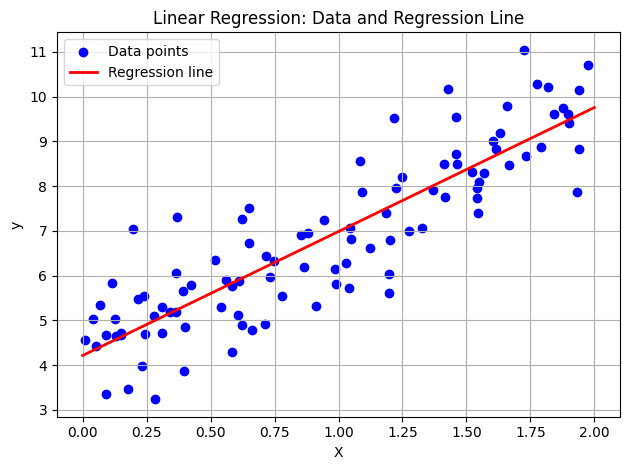

In [26]:
#19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)

X_fit = np.linspace(0, 2, 100).reshape(-1, 1)
y_fit = model.predict(X_fit)

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_fit, y_fit, color='red', linewidth=2, label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression: Data and Regression Line')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
#20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)

n_samples = 150
n_features = 3

X = np.random.rand(n_samples, n_features)

true_coefs = np.array([2.5, -1.2, 3.7])

y = X @ true_coefs + 7 + np.random.randn(n_samples) * 0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("Multiple Linear Regression Model")
print(f"R-squared score: {r2:.4f}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.4f}")


Multiple Linear Regression Model
R-squared score: 0.8362
Coefficients: [ 2.03726948 -1.25617125  3.72828795]
Intercept: 7.2583


In [28]:
#21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)

joblib.dump(model, 'linear_regression_model.joblib')
print("Model saved to 'linear_regression_model.joblib'")

loaded_model = joblib.load('linear_regression_model.joblib')
print("Model loaded from file")

X_new = np.array([[1.5]])
y_pred = loaded_model.predict(X_new)
print(f"Prediction for input {X_new.flatten()}: {y_pred.flatten()[0]:.4f}")


Model saved to 'linear_regression_model.joblib'
Model loaded from file
Prediction for input [1.5]: 8.3703


In [29]:
#22.  Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset

import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

tips = sns.load_dataset('tips')

features = ['total_bill', 'sex', 'smoker', 'day', 'time', 'size']
target = 'tip'

X = tips[features]
y = tips[target]

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R-squared score: {r2:.4f}")
print("Model coefficients:")
for feature, coef in zip(X_encoded.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


R-squared score: 0.4373
Model coefficients:
total_bill: 0.0947
size: 0.2335
sex_Female: -0.0288
smoker_No: 0.1924
day_Fri: 0.1797
day_Sat: -0.0061
day_Sun: 0.1289
time_Dinner: -0.0950
Intercept: 0.4791


In [30]:
#23.  Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Set random seed
np.random.seed(42)

# Generate synthetic data
n_samples = 150
n_features = 5

X = np.random.rand(n_samples, n_features)
true_coefs = np.array([3, -1.5, 2.0, 0, 4.5])
y = X @ true_coefs + 5 + np.random.randn(n_samples) * 0.8

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Linear Regression:")
print(f"R-squared: {r2_lr:.4f}")
print(f"Coefficients: {lr.coef_}\n")

print("Ridge Regression (alpha=1.0):")
print(f"R-squared: {r2_ridge:.4f}")
print(f"Coefficients: {ridge.coef_}")


Linear Regression:
R-squared: 0.7293
Coefficients: [ 3.26493192 -1.71471133  2.25750818 -0.05092431  4.54836162]

Ridge Regression (alpha=1.0):
R-squared: 0.7451
Coefficients: [ 2.95113497 -1.61433521  2.00192419  0.08457046  4.13071539]


In [31]:
#24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=4, noise=10, random_state=42)

model = LinearRegression()

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"R-squared scores for each fold: {cv_scores}")
print(f"Average R-squared score: {cv_scores.mean():.4f}")


R-squared scores for each fold: [0.98832966 0.99284822 0.99025126 0.99300645 0.99306316]
Average R-squared score: 0.9915


In [32]:
#25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
X = np.sort(5 * np.random.rand(200, 1), axis=0)
y = 1 - 2 * X + 0.5 * X**2 + 0.8 * X**3 + np.random.randn(200, 1) * 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 2, 3, 4, 5]

print("Polynomial Regression Performance:")
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"Degree {degree}: R-squared = {r2:.4f}")


Polynomial Regression Performance:
Degree 1: R-squared = 0.8285
Degree 2: R-squared = 0.9837
Degree 3: R-squared = 0.9863
Degree 4: R-squared = 0.9863
Degree 5: R-squared = 0.9863
